In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

# visualization library
import seaborn as sns

In [2]:
df = pd.read_csv("day.csv")
df=df.drop(['casual', 'registered'], axis=1)
#convert date to numerical value
df['dteday'] = pd.to_datetime(df['dteday'],format="%Y/%m/%d").dt.date
df['dteday']=df['dteday'].map(dt.datetime.toordinal)


df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,734138,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,2,734139,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,3,734140,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,4,734141,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,5,734142,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600


# KMeans clustering

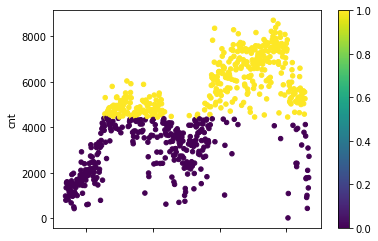

In [3]:
from sklearn.cluster import KMeans
#df_bio[['weight', 'height']]
kmeans = KMeans(n_clusters=2).fit(df[['instant', 'cnt']])
df.plot.scatter('instant', 'cnt', c=kmeans.labels_, colormap='viridis')

<IPython.core.display.Javascript object>


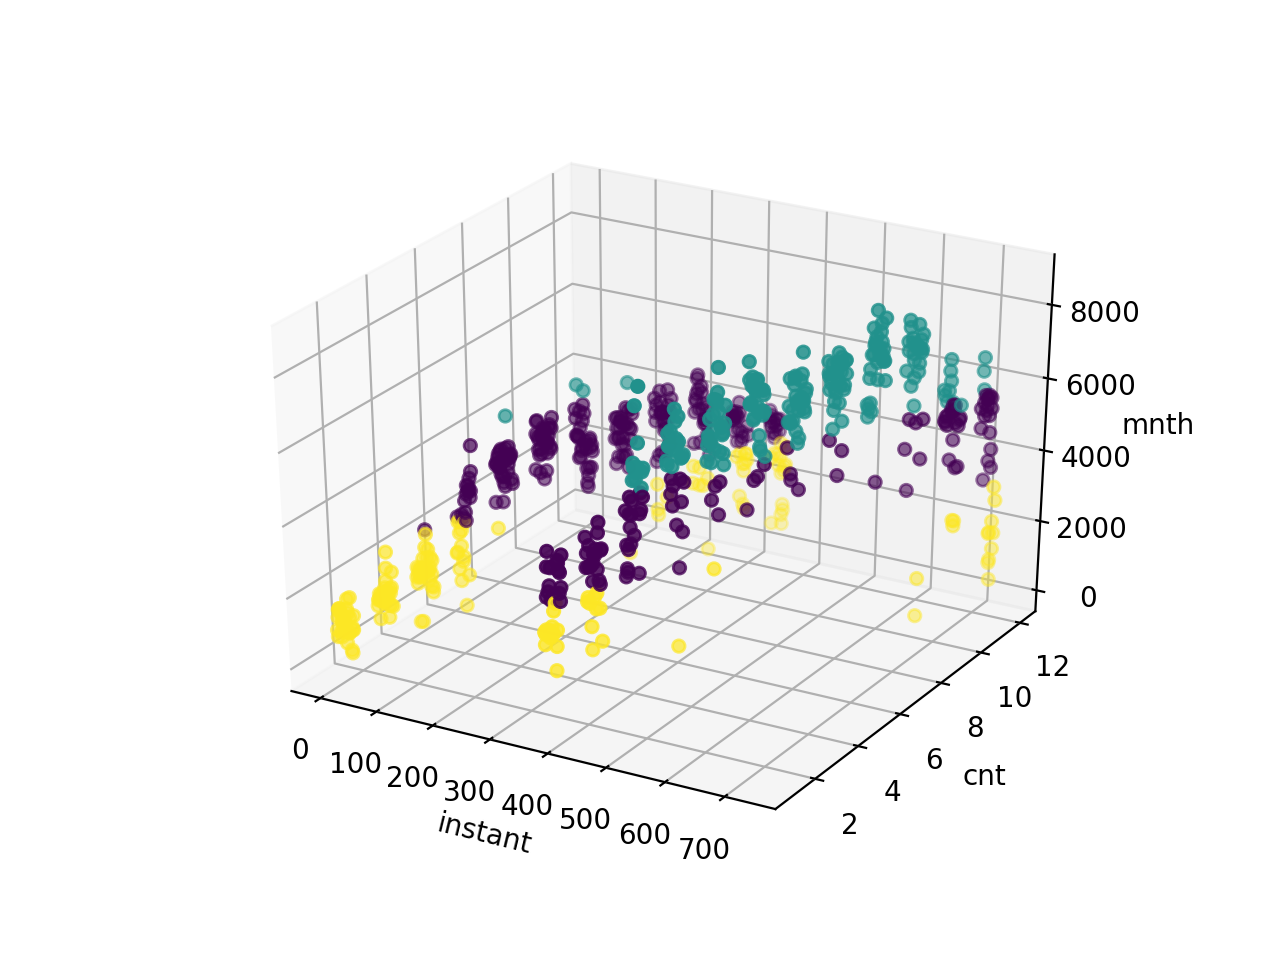

In [4]:
%matplotlib notebook

### K-means social ###
kmeans = KMeans(n_clusters=3).fit(df[['instant', 'mnth', 'cnt']])

from mpl_toolkits.mplot3d import Axes3D
threedee = plt.figure().gca(projection='3d')
threedee.scatter(df['instant'], df['mnth'], df['cnt'], c=kmeans.labels_)
threedee.set_xlabel('instant')
threedee.set_ylabel('cnt')
threedee.set_zlabel('mnth')
plt.show()

### Hierarchical Agglomerative Clustering

In [5]:
%matplotlib inline


# Computing the matrix of distances
from sklearn.metrics.pairwise import euclidean_distances
Q = df[['instant', 'cnt']]
D = euclidean_distances(Q.values.reshape(-1, 2))

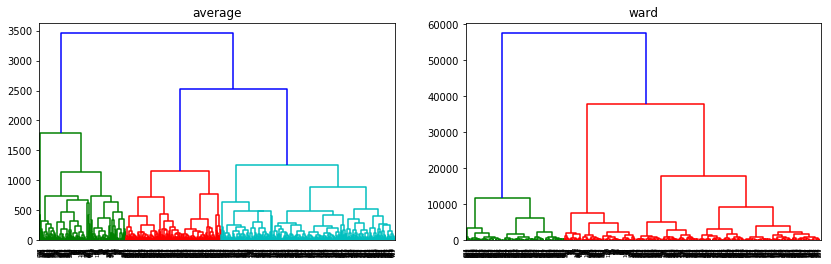

In [6]:
# Average linkage
from scipy.cluster.hierarchy import linkage, dendrogram

plt.figure(figsize=(14, 4))

plt.subplot(1, 2, 1)
clusta = linkage(Q, 'average')
dbd1 = dendrogram(clusta)
plt.title('average')

plt.subplot(1, 2, 2)
clustw = linkage(Q, 'ward')
dbd2 = dendrogram(clustw)
plt.title('ward')

plt.show()

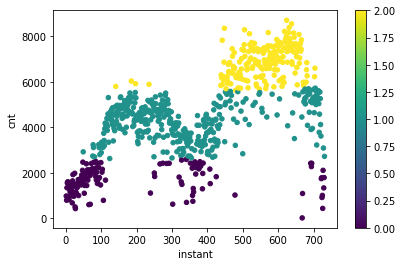

In [7]:
# extracting the clusters
from scipy.cluster.hierarchy import fcluster, cut_tree
clusterw = cut_tree(clustw, 3)

plt.figure(figsize=(14, 4))
ax = plt.subplot(1, 2, 2)
df.plot.scatter('instant', 'cnt', c=clusterw.reshape(-1), colormap='viridis', ax=ax)
plt.show()

# Comparation Kmeans-Hierarchical (n=2)

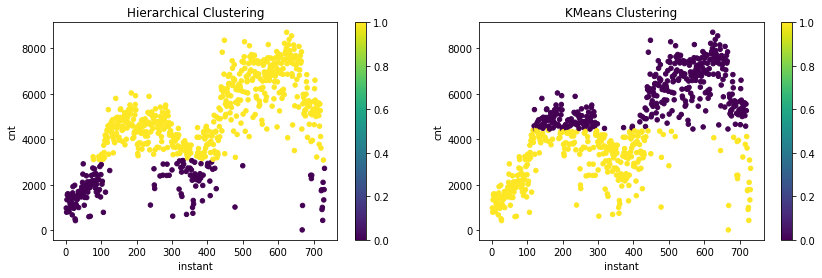

In [8]:
clustera = cut_tree(clusta, 2)
kmeans = KMeans(n_clusters=2).fit(df[['instant', 'cnt']])

plt.figure(figsize=(14, 4))
ax1 = plt.subplot(1, 2, 1)
ax1.title.set_text('Hierarchical Clustering')
df.plot.scatter('instant', 'cnt', c=clustera.reshape(-1), colormap='viridis', ax=ax1)

ax2 = plt.subplot(1, 2, 2)
ax2.title.set_text('KMeans Clustering')
df.plot.scatter('instant', 'cnt', c=kmeans.labels_, colormap='viridis',ax=ax2)
plt.show()

# Clustering evaluation

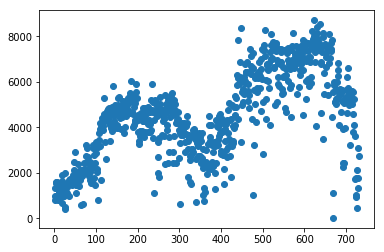

In [9]:
feature_cols = ['instant','cnt']
X = np.array(df.loc[:, feature_cols])
plt.scatter(X[:,0],X[:,1], label='True Position')  
plt.show()

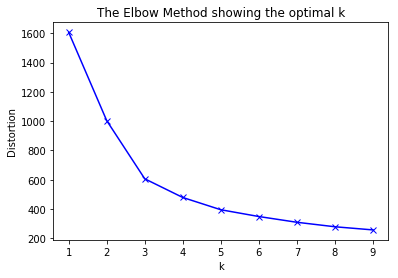

In [14]:
#choosing the number of clusters
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist



feature_cols = ['instant','cnt']
X = np.array(df.loc[:, feature_cols])

# k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

933685671.3271577


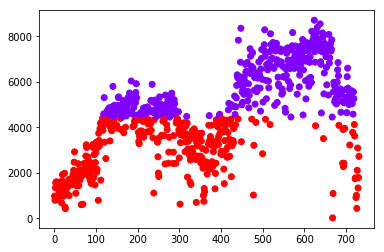

361790815.42576015


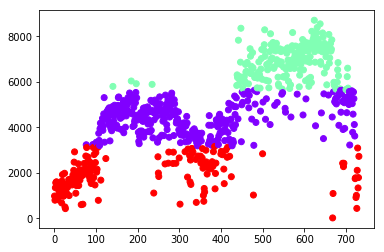

220670664.4601531


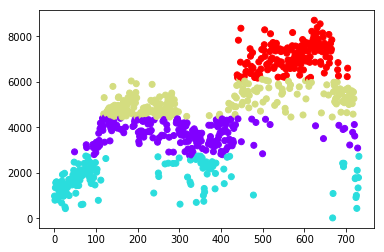

154127966.24612027


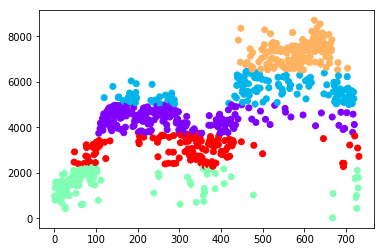

116249177.57809329


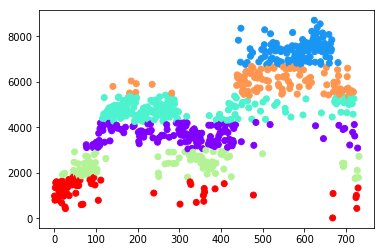

88919117.11940879


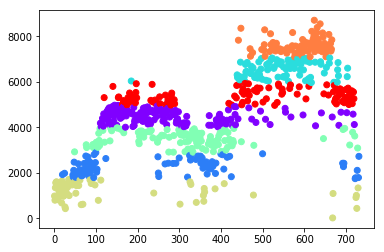

73893941.95785068


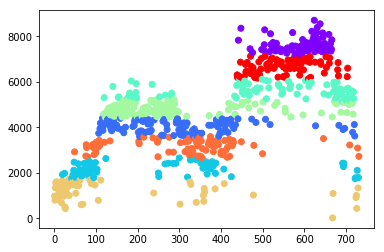

In [35]:
from sklearn.cluster import KMeans

for n in range(2,9):
    kmeans = KMeans(n_clusters=n)  
    kmeans.fit(X)  
    print(kmeans.inertia_)
    plt.scatter(X[:,0],X[:,1], c=kmeans.labels_, cmap='rainbow')  
    plt.show()

# Adding cluster label (to use for classification)

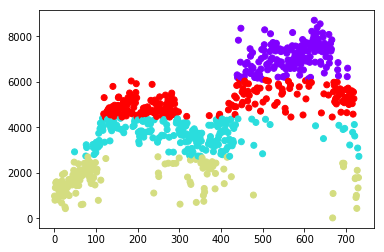

In [4]:
from sklearn.cluster import KMeans

feature_cols = ['instant','cnt']
X = np.array(df.loc[:, feature_cols])

#Adding cluster feature
kmeans = KMeans(n_clusters=4)  
kmeans.fit(X)  
plt.scatter(X[:,0],X[:,1], c=kmeans.labels_, cmap='rainbow')  
plt.show()


In [43]:
#[0:low, 3:mid, 1:good, 2:very good]
df["cluster"]=kmeans.labels_
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,cluster
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985,0
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801,0
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349,0
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562,0
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600,0


In [52]:
df['cluster'].replace([0], 'low',inplace=True)
df['cluster'].replace([3], 'mid',inplace=True)
df['cluster'].replace([1], 'good',inplace=True)
df['cluster'].replace([2], 'very_good',inplace=True)
df.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,cluster
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985,low
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801,low
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349,low
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562,low
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600,low


In [53]:
import datetime as dt

df = pd.read_csv("df_Preprocessed.csv")


#convert date to numerical value
df['dteday'] = pd.to_datetime(df['dteday'],format="%Y/%m/%d").dt.date
df['dteday']=df['dteday'].map(dt.datetime.toordinal)



df.to_csv('df_Preprocessed.csv', index=False)